In [5]:
"""Finish all TODO items in this file to complete the isolation project, then
test your agent's strength against a set of known agents using tournament.py
and include the results in your report.
"""
import random

class SearchTimeout(Exception):
    """Subclass base exception for code clarity. """
    
    

"""
Move Options:

'Move Options' attempts to return a more robust version of "Number of My Moves"
by returning the total number of spaces acessable up to 'depth' moves in the future.
this incresed the search time per call to the heuristic and over all only provides 
minor improvements with depth beyond 1 and diminishing returns after 3 levels
"""

"""
My moves - Opp moves - Distance from center:

This custom score balances heuristic of maximizing the players moves and 
minimizing the opponents moves with the heuristic of avoiding the corners
of the board.
"""
def custom_score(game, player):
    """Calculate the heuristic value of a game state from the point of view
    of the given player.

    This should be the best heuristic function for your project submission.

    Note: this function should be called from within a Player instance as
    `self.score()` -- you should not need to call this function directly.

    Parameters
    ----------
    game : `isolation.Board`
        An instance of `isolation.Board` encoding the current state of the
        game (e.g., player locations and blocked cells).

    player : object
        A player instance in the current game (i.e., an object corresponding to
        one of the player objects `game.__player_1__` or `game.__player_2__`.)

    Returns
    -------
    float
        The heuristic value of the current game state to the specified player.
    """
    # TODO: finish this function!
    # No win situation
    if game.is_loser(player):
        return float("-inf")
    # Best outcome
    if game.is_winner(player):
        return float("inf")

    # Tuning parameter
    p0 = 0.5 
            
    # Improved Score
    own_len = float(len(game.get_legal_moves(player)))
    opp_len = float(len(game.get_legal_moves(game.get_opponent(player))))
    score = own_len - opp_len
    
    """
    Center Score:

    Returns the vertical + horzontal distance from the board center for the given player.
    This is faster to compute than the square distance while still preserving the ordering
    of scores computed. Since the the Minimax algorithim is only concerned with Min or Max
    the ordering of scores is all that matters.

    Generaly this is used to preferentialy keep the player near the center as trapping 
    often occurs at the corners especially late in the game
    """
    
    # Center Score
    w, h = game.width / 2., game.height / 2.
    y, x = game.get_player_location(player)
    dist = float(abs(h - y) + abs(w - x))
    score -= p0*(dist)
    
    # My moves - Opp moves - Distance from board center
    return score

# Suggestion from reviewer
def custom_score_alt(game, player):

    # No win situation
    if game.is_loser(player):
        return float("-inf")
    # Best outcome
    if game.is_winner(player):
        return float("inf")

    # get current move count
    move_count = game.move_count

    # count number of moves available
    own_moves = len(game.get_legal_moves(player))
    opp_moves = len(game.get_legal_moves(game.get_opponent(player)))

    # calculate weight
    w = 10 / (move_count + 1)

    # return weighted delta of available moves
    return float(own_moves - (w * opp_moves))
    return score

"""
Find a way out:

This custom score simply favors more move options and near the end 
of the game it looks further and further out to find paths game states
with the most available outs
"""
def custom_score_2(game, player):
    """Calculate the heuristic value of a game state from the point of view
    of the given player.

    Note: this function should be called from within a Player instance as
    `self.score()` -- you should not need to call this function directly.

    Parameters
    ----------
    game : `isolation.Board`
        An instance of `isolation.Board` encoding the current state of the
        game (e.g., player locations and blocked cells).

    player : object
        A player instance in the current game (i.e., an object corresponding to
        one of the player objects `game.__player_1__` or `game.__player_2__`.)

    Returns
    -------
    float
        The heuristic value of the current game state to the specified player.
    """
    # TODO: finish this function!
    
    if game.is_loser(player):
        return float("-inf")

    if game.is_winner(player):
        return float("inf")
    
    # calculate weight
    d = game.move_count // 10
    
    # Moves avalible to Knight   
    directions = [(-2, -1), (-2, 1), (-1, -2), (-1, 2),
                  (1, -2), (1, 2), (2, -1), (2, 1)]
    blanks = game.get_blank_spaces() # blank space on the board
    own_moves = set(game.get_legal_moves(player))
    own_moves -= set(game.get_legal_moves(game.get_opponent(player))) # My moves - Opp moves

    # Move Knight up to 'depth' moves away from initial position
    for _ in range(d):
        new_moves = []
        # Find all spaces avalible from current depth
        for r, c in own_moves:
            new_moves.extend([(r + dr, c + dc) for dr, dc in directions
                if (r + dr, c + dc) in blanks])
        #if not len(new_moves):
        #    break
        own_moves = set(new_moves)
    # Return a score that is total number of spaces that can be reached in 'depth' moves
    return float(len(own_moves))  


# Suggestion from reviewer
def custom_score_2_alt(game,player):
    if game.is_loser(player):
        return float("-inf")

    if game.is_winner(player):
        return float("inf")

    score = .0
    total_spaces = game.width * game.height
    remaining_spaces = len(game.get_blank_spaces())
    coefficient = float(total_spaces - remaining_spaces) / float(total_spaces)

    my_moves = game.get_legal_moves(player)
    opponent_moves = game.get_legal_moves(game.get_opponent(player))

    for move in my_moves:
        isNearWall = 1 if (move[0] == 0 or move[0] == game.width - 1 or
            move[1] == 0 or move[1] == game.height - 1) else 0
        score += 1 - coefficient * isNearWall

    for move in opponent_moves:
        isNearWall = 1 if (move[0] == 0 or move[0] == game.width - 1 or
            move[1] == 0 or move[1] == game.height - 1) else 0
        score -= 1 - coefficient * isNearWall

    return score


"""
Fast - My moves
"""
def custom_score_3(game, player):
    """Calculate the heuristic value of a game state from the point of view
    of the given player.

    Note: this function should be called from within a Player instance as
    `self.score()` -- you should not need to call this function directly.

    Parameters
    ----------
    game : `isolation.Board`
        An instance of `isolation.Board` encoding the current state of the
        game (e.g., player locations and blocked cells).

    player : object
        A player instance in the current game (i.e., an object corresponding to
        one of the player objects `game.__player_1__` or `game.__player_2__`.)

    Returns
    -------
    float
        The heuristic value of the current game state to the specified player.
    """
    # TODO: finish this function!
        
    if game.is_loser(player):
        return float("-inf")

    if game.is_winner(player):
        return float("inf")
      
    return float(len(game.get_legal_moves(player))- game.move_count)


def inital():
    parameters = {}
    
    # custom_score
    parameters['p0_1'] = 0.5
    
    # custom_score_2
    #parameters['p0_2'] = 1
    
    # custom_score_3 59 59 57
    #parameters['p0_3'] = 0.5 
    
    return parameters

if __name__ == '__main__':
    parameters = inital()
    
class IsolationPlayer:
    """Base class for minimax and alphabeta agents -- this class is never
    constructed or tested directly.

    ********************  DO NOT MODIFY THIS CLASS  ********************

    Parameters
    ----------
    search_depth : int (optional)
        A strictly positive integer (i.e., 1, 2, 3,...) for the number of
        layers in the game tree to explore for fixed-depth search. (i.e., a
        depth of one (1) would only explore the immediate sucessors of the
        current state.)

    score_fn : callable (optional)
        A function to use for heuristic evaluation of game states.

    timeout : float (optional)
        Time remaining (in milliseconds) when search is aborted. Should be a
        positive value large enough to allow the function to return before the
        timer expires.
    """
    def __init__(self, search_depth=3, score_fn=custom_score, timeout=10.): # search_depth=3
        self.search_depth = search_depth
        self.score = score_fn
        self.time_left = None
        self.TIMER_THRESHOLD = timeout
        # new parameters
        self.halt = False
        
        # testing parameters
        self.name = 'null'
        self.search_depths = []


class MinimaxPlayer(IsolationPlayer):
    """Game-playing agent that chooses a move using depth-limited minimax
    search. You must finish and test this player to make sure it properly uses
    minimax to return a good move before the search time limit expires.
    """
    #def __init__(self, search_depth=3, score_fn=custom_score, timeout=10.):
    #    super(MinimaxPlayer, self).__init__( search_depth, score_fn, timeout)
    #    self.name = 'null'
        
    def get_move(self, game, time_left):
        """Search for the best move from the available legal moves and return a
        result before the time limit expires.

        **************  YOU DO NOT NEED TO MODIFY THIS FUNCTION  *************

        For fixed-depth search, this function simply wraps the call to the
        minimax method, but this method provides a common interface for all
        Isolation agents, and you will replace it in the AlphaBetaPlayer with
        iterative deepening search.

        Parameters
        ----------
        game : `isolation.Board`
            An instance of `isolation.Board` encoding the current state of the
            game (e.g., player locations and blocked cells).

        time_left : callable
            A function that returns the number of milliseconds left in the
            current turn. Returning with any less than 0 ms remaining forfeits
            the game.

        Returns
        -------
        (int, int)
            Board coordinates corresponding to a legal move; may return
            (-1, -1) if there are no available legal moves.
        """
        self.time_left = time_left

        # Initialize the best move so that this function returns something
        # in case the search fails due to timeout
        best_move = (-1, -1)
        if game.get_legal_moves(self):
            self.best_move = game.get_legal_moves(self)[0]
        else:
            return best_move

        try:
            # The try/except block will automatically catch the exception
            # raised when the timer is about to expire.
            self.best_move = self.minimax(game, self.search_depth)
            self.search_depths.append(self.search_depth)
            return self.best_move

        except SearchTimeout: # Handle any actions required after timeout as needed
            pass
        
        # Return the best move from the last completed search iteration
        self.search_depths.append(self.search_depth)
        return self.best_move

    def minimax(self, game, depth):
        """Implement depth-limited minimax search algorithm as described in
        the lectures.

        This should be a modified version of MINIMAX-DECISION in the AIMA text.
        https://github.com/aimacode/aima-pseudocode/blob/master/md/Minimax-Decision.md

        **********************************************************************
            You MAY add additional methods to this class, or define helper
                 functions to implement the required functionality.
        **********************************************************************

        Parameters
        ----------
        game : isolation.Board
            An instance of the Isolation game `Board` class representing the
            current game state

        depth : int
            Depth is an integer representing the maximum number of plies to
            search in the game tree before aborting

        Returns
        -------
        (int, int)
            The board coordinates of the best move found in the current search;
            (-1, -1) if there are no legal moves

        Notes
        -----
            (1) You MUST use the `self.score()` method for board evaluation
                to pass the project tests; you cannot call any other evaluation
                function directly.

            (2) If you use any helper functions (e.g., as shown in the AIMA
                pseudocode) then you must copy the timer check into the top of
                each helper function or else your agent will timeout during
                testing.
        """
        if self.time_left() < self.TIMER_THRESHOLD:
            raise SearchTimeout()

        # TODO: finish this function!
        """ Return the move along a branch of the game tree that
        has the best possible value.  A move is a pair of coordinates
        in (column, row) order corresponding to a legal move for
        the searching player.

        You can ignore the special case of calling this function
        from a terminal state.
        """
        # The built in `max()` function can be used as argmax!
        if not game.get_legal_moves(self):
            return (-1, -1)
        best_move = max(game.get_legal_moves(self),
                   key=lambda m: self.min_value(game.forecast_move(m), depth - 1))
        return best_move
        
    
    def min_value(self, game, depth):
        if self.time_left() < self.TIMER_THRESHOLD:
            raise SearchTimeout()
        moves = game.get_legal_moves()
        if depth == 0 or not moves:
            return self.score(game, self)
        v = float("inf")
        for move in moves:
            v = min(v, self.max_value(game.forecast_move(move), depth - 1))
        return v
        
    def max_value(self, game, depth):
        if self.time_left() < self.TIMER_THRESHOLD:
            raise SearchTimeout()
        moves = game.get_legal_moves()
        if depth == 0 or not moves:
            return self.score(game, self)
        v = float("-inf")
        for move in moves:
            v = max(v, self.min_value(game.forecast_move(move), depth - 1))
        return v


class AlphaBetaPlayer(IsolationPlayer):
    """Game-playing agent that chooses a move using iterative deepening minimax
    search with alpha-beta pruning. You must finish and test this player to
    make sure it returns a good move before the search time limit expires.
    """
    #def __init__(self, search_depth=3, score_fn=custom_score, timeout=10.):
    #    super(AlphaBetaPlayer, self).__init__( search_depth, score_fn, timeout)
    #    self.name = 'null'

    def get_move(self, game, time_left):
        # print("\nGame state:\n{}".format(game.to_string()))
        """Search for the best move from the available legal moves and return a
        result before the time limit expires.

        Modify the get_move() method from the MinimaxPlayer class to implement
        iterative deepening search instead of fixed-depth search.

        **********************************************************************
        NOTE: If time_left() < 0 when this function returns, the agent will
              forfeit the game due to timeout. You must return _before_ the
              timer reaches 0.
        **********************************************************************

        Parameters
        ----------
        game : `isolation.Board`
            An instance of `isolation.Board` encoding the current state of the
            game (e.g., player locations and blocked cells).

        time_left : callable
            A function that returns the number of milliseconds left in the
            current turn. Returning with any less than 0 ms remaining forfeits
            the game.

        Returns
        -------
        (int, int)
            Board coordinates corresponding to a legal move; may return
            (-1, -1) if there are no available legal moves.
        """
        self.time_left = time_left

        # TODO: finish this function!
        
        # Initialize the best move so that this function returns something
        # in case the search fails due to timeout
        best_move = (-1, -1)
        if game.get_legal_moves(self):
            self.best_move = game.get_legal_moves(self)[0]
        else:
            return best_move

        try:
            # The try/except block will automatically catch the exception
            # raised when the timer is about to expire.
            #for depth in range(self.search_depth):
            depth = 0
            self.halt = False
            while not self.halt:
                depth += 1
                self.best_move = self.alphabeta(game, depth)

        except SearchTimeout: # Handle any actions required after timeout as needed
            pass
        #self.search_depth = max(self.search_depth, depth)
        self.search_depths.append(depth)
        # Return the best move from the last completed search iteration
        return self.best_move


    def alphabeta(self, game, depth, alpha=float("-inf"), beta=float("inf")):
        """Implement depth-limited minimax search with alpha-beta pruning as
        described in the lectures.

        This should be a modified version of ALPHA-BETA-SEARCH in the AIMA text
        https://github.com/aimacode/aima-pseudocode/blob/master/md/Alpha-Beta-Search.md

        **********************************************************************
            You MAY add additional methods to this class, or define helper
                 functions to implement the required functionality.
        **********************************************************************

        Parameters
        ----------
        game : isolation.Board
            An instance of the Isolation game `Board` class representing the
            current game state

        depth : int
            Depth is an integer representing the maximum number of plies to
            search in the game tree before aborting

        alpha : float
            Alpha limits the lower bound of search on minimizing layers

        beta : float
            Beta limits the upper bound of search on maximizing layers

        Returns
        -------
        (int, int)
            The board coordinates of the best move found in the current search;
            (-1, -1) if there are no legal moves

        Notes
        -----
            (1) You MUST use the `self.score()` method for board evaluation
                to pass the project tests; you cannot call any other evaluation
                function directly.

            (2) If you use any helper functions (e.g., as shown in the AIMA
                pseudocode) then you must copy the timer check into the top of
                each helper function or else your agent will timeout during
                testing.
        """
        if self.time_left() < self.TIMER_THRESHOLD:
            raise SearchTimeout()

        # TODO: finish this function!
        if not game.get_legal_moves():
            return (-1, -1)
        chk = set()
        cmp = set([float("-inf"),float("inf")])
        for move in game.get_legal_moves():
            v = self.min_value(game.forecast_move(move), depth - 1, alpha, beta)
            chk.add(v)
            if v > alpha:
                alpha = v
                self.best_move = move

        if chk.issubset(cmp):
            self.halt = True

        return self.best_move
       
    def min_value(self, game, depth, alpha, beta):
        if self.time_left() < self.TIMER_THRESHOLD:
            raise SearchTimeout()
        moves = game.get_legal_moves()
        if depth == 0 or not moves:
            return self.score(game, self)
        v = float("inf")
        for move in moves:
            v = min(v, self.max_value(game.forecast_move(move), depth - 1, alpha, beta))
            if v <= alpha:
                return v
            beta = min(beta, v)

        return v
        
    def max_value(self, game, depth, alpha, beta):
        if self.time_left() < self.TIMER_THRESHOLD:
            raise SearchTimeout()
        moves = game.get_legal_moves()
        if depth == 0 or not moves:
            return self.score(game, self)
        v = float("-inf")
        for move in moves:
            v = max(v, self.min_value(game.forecast_move(move), depth - 1, alpha, beta))
            if v >= beta:
                return v
            alpha = max(alpha, v)
            
        return v

NUM_PROCS: 24


This script evaluates the performance of the custom_score evaluation
function against a baseline agent using alpha-beta search and iterative
deepening (ID) called `AB_Improved`. The three `AB_Custom` agents use
ID and alpha-beta search with the custom_score functions defined in
game_agent.py.

                        *************************                         
                             Playing Matches                              
                        *************************                         

 Match #   Opponent     Improved      Custom     Custom_alt    Custom_2   Custom_2_alt   Custom_3   
                       Won  | Lost  Won  | Lost  Won  | Lost  Won  | Lost  Won  | Lost  Won  | Lost 
    1       Random    1953  |  47  1953  |  47  1954  |  46  1950  |  50  1952  |  48  1961  |  39  
    2       MM_Open   1617  |  383 1576  |  424 1648  |  352 1591  |  409 1600  |  400 1620  |  380 
    3      MM_Center  1897  |  103 1892  |  108 1895  |  10

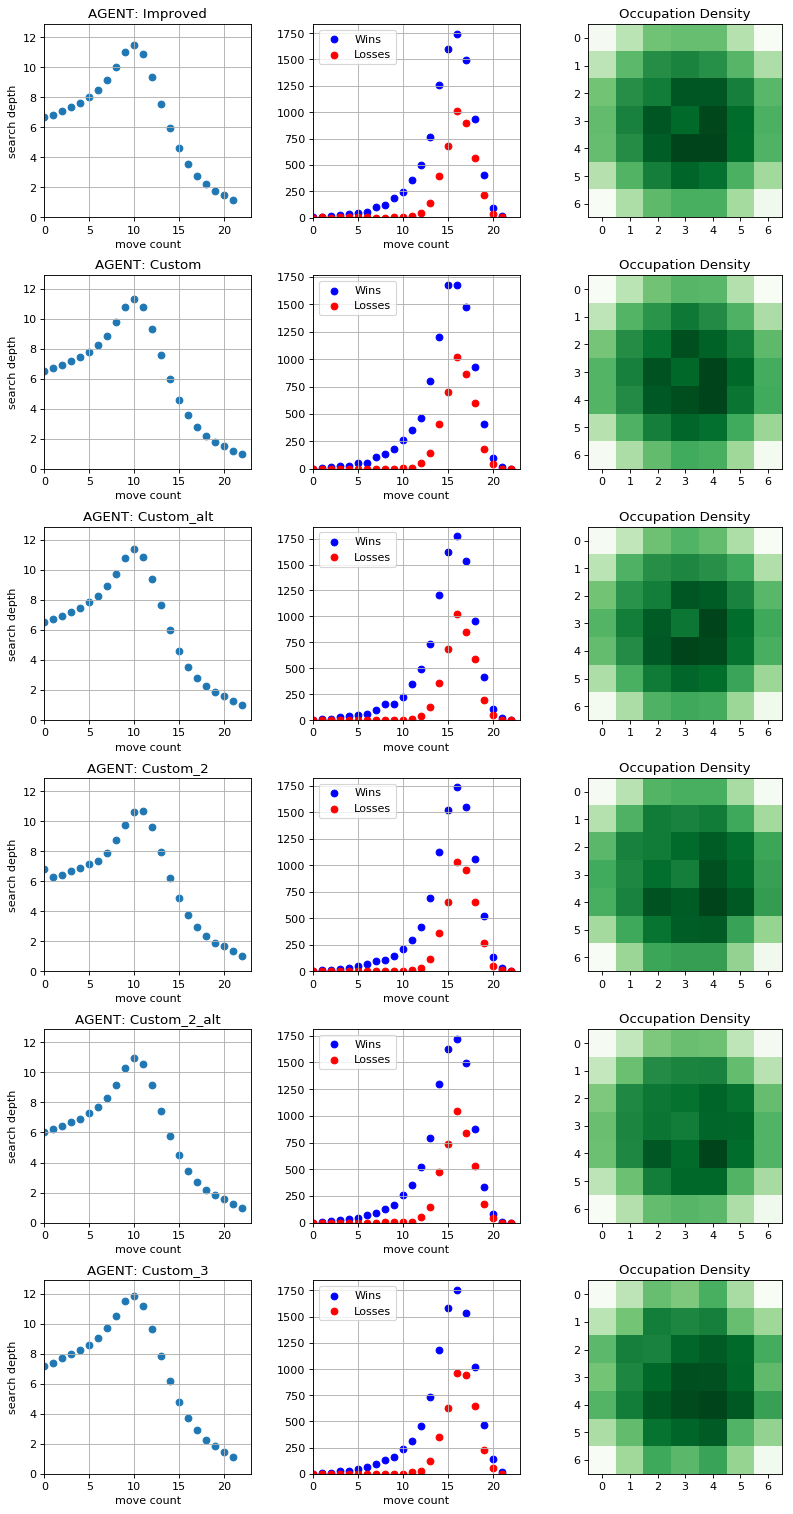

CPU times: user 24.6 s, sys: 4.84 s, total: 29.4 s
Wall time: 2h 15min 9s


In [7]:
%%time

"""Estimate the strength rating of a student defined heuristic by competing
against fixed-depth minimax and alpha-beta search agents in a round-robin
tournament.

NOTE: All agents are constructed from the student CustomPlayer implementation,
so any errors present in that class will affect the outcome.

The student agent plays a number of "fair" matches against each test agent.
The matches are fair because the board is initialized randomly for both
players, and the players play each match twice -- once as the first player and
once as the second player.  Randomizing the openings and switching the player
order corrects for imbalances due to both starting position and initiative.
"""
import itertools
import random
import warnings

from collections import namedtuple
import matplotlib.pyplot as plt
# from multiprocessing.pool import ThreadPool as Pool
import multiprocessing as mp
import numpy as np

from isolation import Board
from sample_players import (RandomPlayer, open_move_score,
                            improved_score, center_score)
#from game_agent import (MinimaxPlayer, AlphaBetaPlayer, custom_score,
#                        custom_score_2, custom_score_3)

NUM_PROCS = mp.cpu_count()
print('NUM_PROCS: {}\n'.format(NUM_PROCS))
NUM_MATCHES = 1000  # number of matches against each opponent
TIME_LIMIT = 150 #150  # number of milliseconds before timeout
WIDTH = 7 # width of gameboard
HEIGHT = 7 # height of gameboard

DESCRIPTION = """
This script evaluates the performance of the custom_score evaluation
function against a baseline agent using alpha-beta search and iterative
deepening (ID) called `AB_Improved`. The three `AB_Custom` agents use
ID and alpha-beta search with the custom_score functions defined in
game_agent.py.
"""

Agent = namedtuple("Agent", ["player", "name"])


def _run(*args):
    idx, p1, p2, moves = args[0]
    game = Board(p1, p2, width=WIDTH, height=HEIGHT)
    for m in moves:
        game.apply_move(m)
    winner, history, termination = game.play(time_limit=TIME_LIMIT)
    p =  p1 if idx % 2 else p2
    search_depths = p.search_depths
    search_depths.append(1 if p == winner else 0)
    l = idx % 2 
    history = [move for n, move in enumerate(history) if (n+l) % 2]
    board = np.zeros((WIDTH,HEIGHT))
    for x, y in history:
        board[x,y] += 1

    return (idx, winner == p1), termination, search_depths, board


def play_round(cpu_agent, test_agents, win_counts, num_matches, search_depths, board_density):
    """Compare the test agents to the cpu agent in "fair" matches.

    "Fair" matches use random starting locations and force the agents to
    play as both first and second player to control for advantages resulting
    from choosing better opening moves or having first initiative to move.
    """
    timeout_count = 0
    forfeit_count = 0
    pool = mp.Pool(NUM_PROCS)
    games = []
    for _ in range(num_matches):
        # initialize all games with a random move and response
        init_moves = []
        init_game = Board("p1", "p2")
        for _ in range(2):
            move = random.choice(init_game.get_legal_moves())
            init_moves.append(move)
            init_game.apply_move(move)
        # Careful. All indexing is based on the first agents added with 'games.extend'
        games.extend(sum([[(2 * i, cpu_agent.player, agent.player, init_moves),
                      (2 * i + 1, agent.player, cpu_agent.player, init_moves)]
                    for i, agent in enumerate(test_agents)], []))

    # play all games and tally the results
    for result, termination, test_search_depths, board in pool.imap_unordered(_run, games):
        game = games[result[0]]
        winner = game[1] if result[1] else game[2]
        win_counts[winner] += 1

        test_agent = game[1] if result[0] % 2 else game[2]
        search_depths[test_agent].append(test_search_depths)
        board_density[test_agent] += board

        if termination == "timeout":
            timeout_count += 1
        elif winner not in test_agents and termination == "forfeit":
            forfeit_count += 1
    pool.close()
    pool.join()
    return timeout_count, forfeit_count


def update(total_wins, wins,
           total_search_depths, search_depths,
           total_board_density, board_density):
    for player in total_wins:
        total_wins[player] += wins[player]
    for player in search_depths:
        total_search_depths[player].extend(search_depths[player])
    for player in board_density:
        total_board_density[player] += board_density[player]
        
    return total_wins, total_search_depths, total_board_density


def play_matches(cpu_agents, test_agents, num_matches):
    """Play matches between the test agent and each cpu_agent individually. """
    total_wins = {agent.player: 0 for agent in test_agents}
    total_timeouts = 0.
    total_forfeits = 0.
    total_search_depths = {agent.player: [] for agent in test_agents}
    total_board_density = {agent.player: np.zeros((WIDTH,HEIGHT)) for agent in test_agents}
    total_matches = 2 * num_matches * len(cpu_agents)
    f = "\n{:^9}{:^13}"+"".join("{:^13}" * len(test_agents))
    print(f.format(
        "Match #", "Opponent", *[agent.name for agent in test_agents]))
    f = "{:^9}{:^13}"+"".join("{:^5} | {:^5}" * len(test_agents))
    print(f.format("", "", *(["Won", "Lost"] * len(test_agents))))
    
    for idx, cpu_agent in enumerate(cpu_agents):
        wins, search_depths, board_density = {}, {}, {}
        for test_agent in test_agents:
            wins[test_agent.player] = 0
            search_depths[test_agent.player] = []
            board_density[test_agent.player] = np.zeros((WIDTH,HEIGHT))
        wins[cpu_agent.player] = 0

        print("{!s:^9}{:^13}".format(idx + 1, cpu_agent.name), end="", flush=True)

        counts = play_round(cpu_agent, test_agents, wins, num_matches, search_depths, board_density)
        total_timeouts += counts[0]
        total_forfeits += counts[1]
        total_wins, total_search_depths, total_board_density = update(
            total_wins, wins,
            total_search_depths, search_depths,
            total_board_density, board_density)
        _total = 2 * num_matches
        round_totals = sum([[wins[agent.player], _total - wins[agent.player]]
                            for agent in test_agents], [])
        f = "".join("{:^5} | {:^5}"*len(test_agents))
        print(f.format(*round_totals))

    print("-" * 74)
    win_rate = [total_wins[a.player] / total_matches for a in test_agents]
    # Wald method for %95 confidence interval
    err_rate = [2*(p * (1-p) / total_matches)**0.5 for p in win_rate]
    f = "{:^9}{:^13}"+"".join("{:^13}"*len(test_agents))+"\n"
    print(f.format("", "Win Rate:",
        *["{:.1f}%±{:.1f}%".format(100 * w, 100 * e)
          for w, e in zip(win_rate,err_rate)]
    ))

    if total_timeouts:
        print(("\nThere were {} timeouts during the tournament -- make sure " +
               "your agent handles search timeout correctly, and consider " +
               "increasing the timeout margin for your agent.\n").format(
            total_timeouts))
    if total_forfeits:
        print(("\nYour ID search forfeited {} games while there were still " +
               "legal moves available to play.\n").format(total_forfeits))
        
    # Plotting
    plt.close('all')
    f, axarr = plt.subplots(
        len(test_agents), 3,
        figsize=(3*4,len(test_agents)*4), dpi=80)
    f.subplots_adjust(hspace=0.3, wspace=0.3)
    max_x = 0
    max_y = 0
    for n, agent in enumerate(test_agents):
        wins = []
        for i, search_depth in enumerate(total_search_depths[agent.player]):
            wins.append(search_depth[-1])
            total_search_depths[agent.player][i] = search_depth[:-1]
        y = [[] for i in range(len(max(total_search_depths[agent.player], key=len)))]
        x = list(range(len(y)))
        winsx = x
        winsy = [0] * len(y)
        lossy = [0] * len(y)
        for i, search_depth in enumerate(total_search_depths[agent.player]):
            winsy[len(search_depth)-1] += wins[i]
            lossy[len(search_depth)-1] += 1 if wins[i] == 0 else 0
            for m, val in enumerate(search_depth):
                y[m].append(val)
        for m in range(len(y)):
            y[m] = sum(y[m])/len(y[m])
        max_x = max(max_x, len(y))
        max_y = max(max_y, *y)
        axarr[n, 0].scatter(x,y)
        axarr[n, 0].set_title('AGENT: ' + agent.name)
        axarr[n, 1].scatter(winsx, winsy, c='b', label='Wins')
        axarr[n, 1].scatter(winsx, lossy, c='r', label='Losses')
        axarr[n, 2].imshow(total_board_density[agent.player], cmap='Greens', interpolation='nearest')
        axarr[n, 2].set_title('Occupation Density')
    #plt.axis('tight')
    for a in axarr[:,0]:
        a.set_xlim((0,max_x))
        a.set_ylim((0,max_y+1))
        a.grid(which='both')
        a.set_xlabel('move count')
        a.set_ylabel('search depth')
    for a in axarr[:,1]:
        #a.set_xticks(list(range(WIDTH)))
        a.set_xlim((0,max_x))
        a.set_ylim(bottom=1)
        a.grid(which='both')
        a.set_xlabel('move count')
        a.legend(loc=2)
        #a.set_yticks(list(range(HEIGHT)))
    for a in axarr[:,2]:
        a.set_xticks(list(range(WIDTH)))
        a.set_yticks(list(range(HEIGHT)))
    plt.show()


def main():

    # Define two agents to compare -- these agents will play from the same
    # starting position against the same adversaries in the tournament
    scheme = 'AB'
    if scheme == 'AB':
        test_agents = [
            Agent(AlphaBetaPlayer(score_fn=improved_score), "Improved"),
            Agent(AlphaBetaPlayer(score_fn=custom_score), "Custom"),
            Agent(AlphaBetaPlayer(score_fn=custom_score_alt), "Custom_alt"),
            Agent(AlphaBetaPlayer(score_fn=custom_score_2), "Custom_2"),
            Agent(AlphaBetaPlayer(score_fn=custom_score_2_alt), "Custom_2_alt"),
            Agent(AlphaBetaPlayer(score_fn=custom_score_3), "Custom_3")
        ]
    elif scheme == 'MM':
        test_agents = [
            Agent(MinimaxPlayer(score_fn=improved_score), "Improved"),
            Agent(MinimaxPlayer(score_fn=custom_score), "Custom"),
            Agent(MinimaxPlayer(score_fn=custom_score_alt), "Custom_alt"),
            Agent(MinimaxPlayer(score_fn=custom_score_2), "Custom_2"),
            Agent(MinimaxPlayer(score_fn=custom_score_2_alt), "Custom_2_alt"),
            Agent(MinimaxPlayer(score_fn=custom_score_3), "Custom_3")
        ]
    else:
        raise 

    # Define a collection of agents to compete against the test agents
    cpu_agents = [
        Agent(RandomPlayer(), "Random"),
        Agent(MinimaxPlayer(score_fn=open_move_score), "MM_Open"),
        Agent(MinimaxPlayer(score_fn=center_score), "MM_Center"),
        Agent(MinimaxPlayer(score_fn=improved_score), "MM_Improved"),
        Agent(AlphaBetaPlayer(score_fn=open_move_score), "AB_Open"),
        Agent(AlphaBetaPlayer(score_fn=center_score), "AB_Center"),
        Agent(AlphaBetaPlayer(score_fn=improved_score), "AB_Improved")
    ]

    print(DESCRIPTION)
    print("{:^74}".format("*************************"))
    print("{:^74}".format("Playing Matches"))
    print("{:^74}".format("*************************"))
    play_matches(cpu_agents, test_agents, NUM_MATCHES)


if __name__ == "__main__":
    main()


In [2]:
%%time

from sample_players import (RandomPlayer, GreedyPlayer,
                            open_move_score, improved_score, center_score)
from isolation import Board
score_fn = custom_score_3
# create an isolation board (by default 7x7)
# player1 = RandomPlayer()
player1 = AlphaBetaPlayer(score_fn=score_fn)
player1.name = "Me"
player2 = AlphaBetaPlayer(score_fn=improved_score)
game = Board(player1, player2)

# place player 1 on the board at row 2, column 3, then place player 2 on
# the board at row 0, column 5; display the resulting board state.  Note
# that the .apply_move() method changes the calling object in-place.
for _ in range(2):
    move = random.choice(game.get_legal_moves())
    game.apply_move(move)
print(game.to_string())
print(game._board_state)
# players take turns moving on the board, so player1 should be next to move
assert(player1 == game.active_player)

# get a list of the legal moves available to the active player
print(game.get_legal_moves())

# get a successor of the current state by making a copy of the board and
# applying a move. Notice that this does NOT change the calling object
# (unlike .apply_move()).
new_game = game.forecast_move((1, 1))
assert(new_game.to_string() != game.to_string())
#print("\nOld state:\n{}".format(game.to_string()))
#print("\nNew state:\n{}".format(new_game.to_string()))

# play the remainder of the game automatically -- outcome can be "illegal
# move", "timeout", or "forfeit"
winner, history, outcome = game.play()
print("\nWinner: {}\nOutcome: {}".format(winner.name, outcome))
print(game.to_string())
print("Move history:\n{!s}".format(history))

game = Board(player1, player2)
for n, move in enumerate(history):
    game.apply_move(move)
    if n > 2:
        print(move, score_fn(game, game.inactive_player), game.inactive_player.name)
        print(game.to_string())

     0   1   2   3   4   5   6
0  |   |   | B |   |   |   |   | 
1  |   |   |   |   |   |   |   | 
2  |   |   |   |   |   |   |   | 
3  |   |   |   |   |   |   |   | 
4  |   |   |   |   |   |   |   | 
5  |   |   |   |   |   |   |   | 
6  |   |   | A |   |   |   |   | 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 20]
[(5, 4), (5, 0), (4, 1), (4, 3)]

Winner: Me
Outcome: illegal move
     0   1   2   3   4   5   6
0  |   | b | b |   | b | b |   | 
1  |   |   |   | b | b |   | b | 
2  | b | a | b | b | b |   | b | 
3  |   | a | b | a | a |   | A | 
4  |   | b | a | b | a | a | a | 
5  | a | b | a | a |   | a | a | 
6  | B |   | a | a | a | a |   | 

Move history:
[[5, 0], [2, 3], [3, 1], [0, 4], [5, 2], [1, 6], [3, 3], [2, 4], [2, 1], [4, 3], [4, 2], [5, 1], [3, 4], [3, 2], [4, 6], [1, 3], [6, 5], [0, 5], [5, 3], [2, 6], [4, 5], [1, 4], [6, 4], [2, 2], [5, 6], [0, 1], [4, 4], [2,